In [1]:
import pandas as pd
import numpy as np

In [2]:
aapl_googl = pd.read_csv(
    "https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2021/july/3_time_series_manipulation/data/apple_google.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [3]:
aapl_googl.head()

,AAPL,GOOG
Date,,
2010-12-16,45.89,295.56
2010-12-17,45.80,295.10
2010-12-20,46.03,297.23
2010-12-21,46.32,301.23
2010-12-22,46.45,302.44


In [7]:
sp = pd.read_csv(
    "https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2021/july/3_time_series_manipulation/data/sp500.csv",
)

In [8]:
sp.head()

,date,SP500
0,2007-06-29,1503.35
1,2007-07-02,1519.43
2,2007-07-03,1524.87
3,2007-07-05,1525.40
4,2007-07-06,1530.44


In [11]:
sp['date'] = pd.to_datetime(sp['date'])

In [15]:
assert sp['date'].dtype == 'datetime64[ns]'

In [12]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2395 non-null   datetime64[ns]
 1   SP500   2395 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.5 KB


In [27]:
sp['year'] = sp['date'].dt.dayofweek

In [29]:
sp['date']

0      2007-06-29
1      2007-07-02
2      2007-07-03
3      2007-07-05
4      2007-07-06
          ...    
2390   2016-12-23
2391   2016-12-27
2392   2016-12-28
2393   2016-12-29
2394   2016-12-30
Name: date, Length: 2395, dtype: datetime64[ns]

In [32]:
sp['shifted1'] = sp['date'].shift(periods=1)
sp['shifted2'] = sp['date'].shift(periods=2)
sp['lag1'] = sp['date'].shift(periods=-1)

In [33]:
sp.head()

,date,SP500,year,shifted1,shifted2,lag1
0,2007-06-29,1503.35,4,NaT,NaT,2007-07-02
1,2007-07-02,1519.43,0,2007-06-29,NaT,2007-07-03
2,2007-07-03,1524.87,1,2007-07-02,2007-06-29,2007-07-05
3,2007-07-05,1525.40,3,2007-07-03,2007-07-02,2007-07-06
4,2007-07-06,1530.44,4,2007-07-05,2007-07-03,2007-07-09


In [36]:
sp['diff'] = sp['date'] - sp['shifted1']

In [37]:
sp['diff']

0         NaT
1      3 days
2      1 days
3      2 days
4      1 days
        ...  
2390   1 days
2391   4 days
2392   1 days
2393   1 days
2394   1 days
Name: diff, Length: 2395, dtype: timedelta64[ns]

<AxesSubplot:>

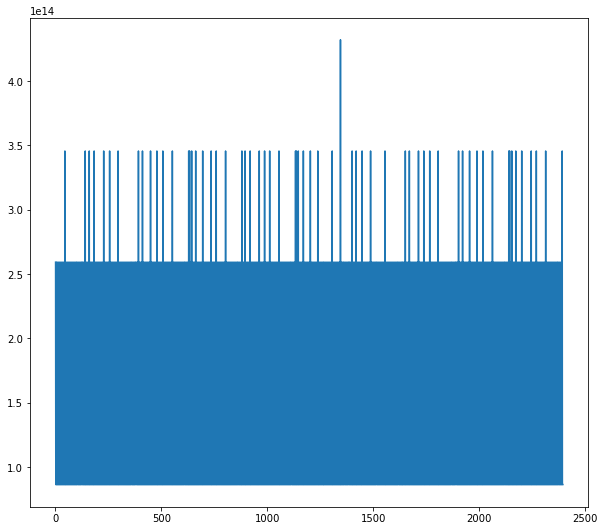

In [38]:
sp['diff'].plot(figsize=(10, 9))

In [39]:
sp['diff'].min()

Timedelta('5 days 00:00:00')